(700, 700)
(700, 700)


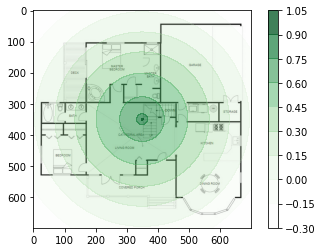

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import PIL
from PIL import Image

#2D Gaussian function
def twoD_Gaussian(x, y, xo, yo, sigma_x, sigma_y):
    a = 1./(2*sigma_x**2) + 1./(2*sigma_y**2)              #Constants for the Guassian Term
    c = 1./(2*sigma_x**2) + 1./(2*sigma_y**2)
    
    gaus = np.exp(-(a*((x-xo)**2) + c*((y-yo)**2)))        #Gaussian decay term
    
    alpha = 0.01                                           #Decay constant for log loss term
    dist = 10*alpha*np.log10(((x-xo)**2) + ((y-yo)**2))    #Log loss term
    
    const = np.full(gaus.shape, 0)                         #Const term
    
    print(const.shape)
    print(dist.shape)
    
    net = gaus - dist + const 
    return net.ravel()

def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap


#Use base cmap to create transparent
mycmap = transparent_cmap(plt.cm.Greens)


# Import image and get x and y extents
I = Image.open(r"C:\Users\Asus\Documents\Python\test_im.jpeg")
p = np.asarray(I).astype('float')
w, h = I.size
y, x = np.mgrid[0:h, 0:w]

#Plot image and overlay colormap
fig, ax = plt.subplots(1, 1)
ax.imshow(I)
Gauss = twoD_Gaussian(x, y, 0.5*x.max(), .5*y.max(), 0.6*x.max(), 0.6*y.max())
cb = ax.contourf(x, y, Gauss.reshape(x.shape[0], y.shape[1]), 10, cmap=mycmap)
plt.colorbar(cb)
plt.show()